# Examen parcial 2 (raizes y ~interpolacion)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 04.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. 
Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [1]:
# tu codigo:
def f_cost(x,c):
    return ((x+1)**2) - (c*(x-1)) 

## 2. 
Usando funcion `f_cost` haz un gráfico con cuatro curvas para c=5,10,15,20 y con x entre -10,20 (50 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas

/usr/lib64/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  import sys
/usr/lib64/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.


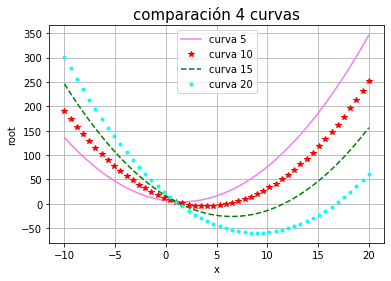

In [2]:
# tu codigo:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-10,20,50)
fig,ax = plt.subplots(1,1)
ax.plot(x,f_cost(x,5),'k',color="violet", label='curva 5')
ax.plot(x,f_cost(x,10),'*', color="red", label='curva 10')
ax.plot(x,f_cost(x,15),"--", color="g", label='curva 15')
ax.plot(x,f_cost(x,20),'.k',color="cyan", label='curva 20')
plt.title('comparación 4 curvas', c='black',fontsize=15)
plt.ylabel('root',fontsize=10)
plt.xlabel('x',fontsize=10)
ax.grid('True')
plt.legend()
plt.show()

## 2a. Para cual `c` esta funcion no tiene raices?

In [3]:
# tu respuesta
import scipy.optimize as optimize

In [4]:
c=5
try:
    r = optimize.newton(f_cost, 10,args=(c,))
except:
    r=np.nan

print (r)

nan


In [5]:
c=10
try:
    r = optimize.newton(f_cost, 10,args=(c,))
except:
    r=np.nan

print (r)

6.236067977499789


In [6]:
c=15
try:
    r = optimize.newton(f_cost, 10,args=(c,))
except:
    r=np.nan

print (r)

11.623475382979793


In [7]:
c=20
try:
    r = optimize.newton(f_cost, 10,args=(c,))
except:
    r=np.nan

print (r)

16.745966692414836


## 3. 
Cree una función llamada `root_finding()` que devuelva el valor de la raíz (si existiera) para cada parametro `c` (pense `Newton` o `bisecion`). Usando esta funcion vamos a buscar primero raiz izquierda y despues raiz derecha.

In [8]:
def biseccion(f,a,b,err=1e-10,pei=False):
    if f(a)*f(b) < 0.0:
        i = 0
        a1 = a 
        b1 = b
        pm = (a1 + b1)/2 
        puntos = [pm]
        iteraciones = [0]
        if f(pm) == 0: return pm  
        while True:
            i = i + 1
            p0 = a1
            p1 = pm
            puntos.append(p0)
            iteraciones.append(i)
            if abs(f(p1) - f(p0)) < err : break 
            elif f(a1)*f(pm) < 0.0: b1 = pm
            elif f(a1)*f(pm) > 0.0: a1 = pm 
            pm = (a1+b1)/2
        if pei == False:
            return pm
        else:
            return puntos, iteraciones, pm
    else:
        print('INTERVALO MAL DEFINIDO')   


## 4a. 
Primero vamos a mirar el comportamiento de raiz de lado izquierda: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `left_roots`

In [9]:
# tu codigo:
c_vec=np.linspace(5,100,50)
c=10
left_roots=[]
start=0
for c in c_vec:
    try:
        r =  biseccion(f_cost, 0,10)
    except:
        r =np.nan
        
    left_roots.append(r)


## 4b 
Hacer un gráfico de raíz izquierda vs c

## 5a. 
Ahora vamos a mirar el comportamiento de raiz de lado derecha: Defina el vector `c_vec` que contiene 50 valores de 5 a 100. En el loop, llame a la función `root_finding()` para cada valor `c` en el vector `c_vec`. Guarda los resultados en variable `right_roots`.

In [10]:
# tu codigo:
c_vec=np.linspace(5,100,50)
c=10
left_roots=[]
start=0
for c in c_vec:
    try:
        r =  biseccion(f_cost, -10,0)
    except:
        r =np.nan
        
    left_roots.append(r)

## 5b
* Hacer un gráfico de raíz derecha vs c

## 6. 
Pregunta:
* este cierto *rango* para cual se obtiene un comportamiento complejo esta convergente o divergente cuando `c` es creciente
* si este rango esta convergiendo, ¿a qué valor?
* si este rango esta divergente, como esta divergente (lineal, cuadrático, diferente)

# Feedback:

`Correct implementation of the f_cost function + labeled plot 	  (max 2.0p):	2.0p`
`Correct implementation of the root finding function 		       (max 2.0p):	1.0p`
`Correct result of the evolution of the left roots (+ plot)	     (max 2.0p):	1.0p`
`Correct result of the evolution of the right roots (+ plot)	    (max 2.0p):	1.0p`
`Correct conclusion of the range behavious			              (max 2.0p):	0.0p`

`- Total:                                                          (max 10.0p):   5.0p`

#### Comments: graphs are missing